In [2]:
import os
from nltk.tokenize import word_tokenize
import nltk
from nltk.corpus import stopwords
from nltk.stem.porter import PorterStemmer
from gensim import corpora, models
import gensim
import pdb
import matplotlib.pyplot as plt
from wordcloud import WordCloud
from nltk.stem.wordnet import WordNetLemmatizer
from gensim import interfaces, matutils, utils
import re
from datetime import date
import matplotlib.dates as mdates
import dateutil.parser
import string

from matplotlib.dates import DateFormatter
import numpy as np

In [8]:
sps = set(stopwords.words('english'))
file = open("atire_puurula.txt")
for line in file:
    sps.add(line.strip())
file = open("my_stops.txt")
for line in file:
    sps.add(line.strip())
file = open("names.txt")
for line in file:
    sps.add(line.strip())
file = open("review/stopwords.dat")
for line in file:
    sps.add(line.strip())
map(sps.add, ["from", "sent", "to", "subject", ])

In [43]:
data = []
labels = []

sps.add
lemma = WordNetLemmatizer()
reviewsFile = open("./review/reviews.dat")
for line in reviewsFile:
    tokens = word_tokenize(line)
    tokens = list(map(lemma.lemmatize, tokens))
    tokens = [w.lower() for w in tokens if w.isalpha()]
    data.append([w for w in tokens if not w in sps])

labelsFile = open("./review/3ratings.dat")
for line in labelsFile:
    labels.append(float(line))

In [10]:
dictionary = corpora.Dictionary(data)
corpus = [dictionary.doc2bow(text) for text in data]

In [ ]:
dictionary.num_pos

515584

In [16]:
topics = [3,5,10,15,20,25,30,40,50]
models = []
perplexities = []
for i in topics:
    print(i)
    tempmodel = gensim.models.ldamodel.LdaModel(corpus, num_topics=i, id2word = dictionary, passes=30)
    models.append(tempmodel)
    perplex = tempmodel.bound(corpus)
    perplexities.append(np.exp2(-perplex / sum(cnt for document in list(corpus) for _, cnt in document)))

3
5
10
15
20
25
30
40
50


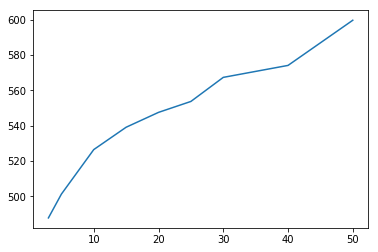

In [19]:
plt.plot(topics, perplexities)

In [ ]:
ldamodel = models[6]
for t in range(ldamodel.num_topics):
    plt.figure()
    plt.imshow(WordCloud().fit_words(dict(ldamodel.show_topic(t, 200))))
    plt.axis("off")
    plt.title("Topic #" + str(t))
    plt.show()

In [ ]:
from nltk.sentiment.vader import SentimentIntensityAnalyzer

In [ ]:
sid = SentimentIntensityAnalyzer()

In [21]:
ldamodel = models[1]
for t in range(ldamodel.num_topics):
    print("For topic", t) 
    print(sid.polarity_scores(' '.join([x[0] for x in ldamodel.show_topic(t,10)])))

For topic 0
{'neg': 0.152, 'neu': 0.13, 'pos': 0.719, 'compound': 0.9022}
For topic 1
{'neg': 0.623, 'neu': 0.377, 'pos': 0.0, 'compound': -0.836}
For topic 2
{'neg': 0.0, 'neu': 0.368, 'pos': 0.632, 'compound': 0.8519}
For topic 3
{'neg': 0.48, 'neu': 0.224, 'pos': 0.296, 'compound': -0.6249}
For topic 4
{'neg': 0.248, 'neu': 0.51, 'pos': 0.242, 'compound': -0.0258}


In [38]:
correctRates = []
for ldamodel in models:
    topicToScore = []
    for t in range(ldamodel.num_topics):
        scores = sid.polarity_scores(' '.join([x[0] for x in ldamodel.show_topic(t,10)]))
        if scores['neg'] > scores['neu'] and scores['neg'] > scores['pos']:
            topicToScore.append(0)
        elif scores['pos'] > scores['neu'] and scores['pos'] > scores['neg']:
            topicToScore.append(2)
        else:
            topicToScore.append(1)

    correct = 0
    for x in zip(corpus, labels):
        max_topic = sorted(ldamodel[x[0]], key=lambda x: x[1])[-1]
        score = topicToScore[max_topic[0]]
        #print("Topic", max_topic, "Score", score, "True score", x[1])
        if score == x[1]:
            correct += 1
    print(correct / len(labels))
    correctRates.append(correct / len(labels))

0.30123851378345984
0.24730323611666
0.3326008789452657
0.27686775868957253
0.3092289252896524
0.34738314023172195
0.3733519776268478
0.2780663204155014
0.3751498202157411


In [45]:
correct = 0
for text, label in zip(data, labels):
    scores = sid.polarity_scores(' '.join(text))
    score = 0
    if scores['neg'] > scores['neu'] and scores['neg'] > scores['pos']:
        score = 0
    elif scores['pos'] > scores['neu'] and scores['pos'] > scores['neg']:
        score = 2
    else:
        score = 1
    if score == label:
        correct += 1
print(correct / len(labels))
print(len(data))

0.3863363963244107
5006


Text(0,0.5,'Accuracy')

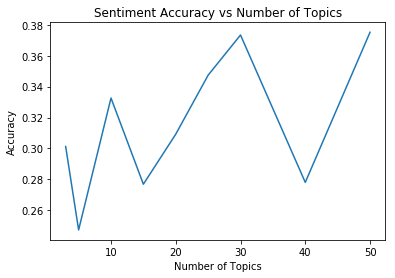

In [46]:
plt.plot(topics,correctRates)
plt.title("Sentiment Accuracy vs Number of Topics")
plt.xlabel("Number of Topics")
plt.ylabel("Accuracy")

In [61]:
tempmodel = gensim.models.ldamodel.LdaModel(corpus, num_topics=i, id2word = dictionary, passes=30)

In [47]:
def create_word_cloud(lda):
    for t in range(lda.num_topics):
        plt.figure()
        plt.imshow(WordCloud().fit_words(dict(lda.show_topic(t, 200))))
        plt.axis("off")
        plt.title("Topic #" + str(t))
        plt.show()

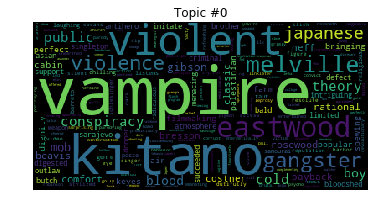

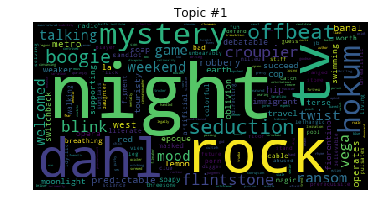

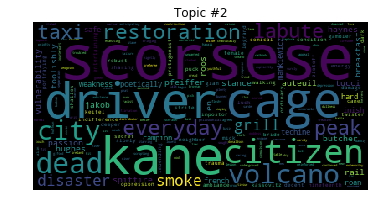

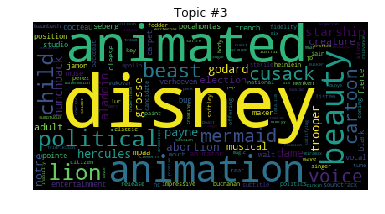

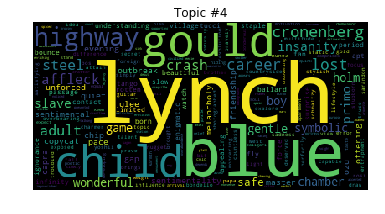

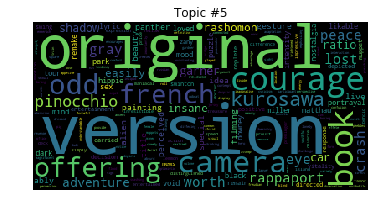

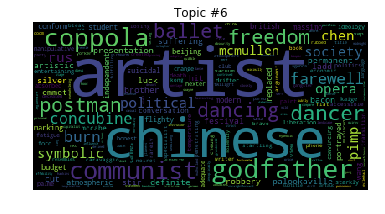

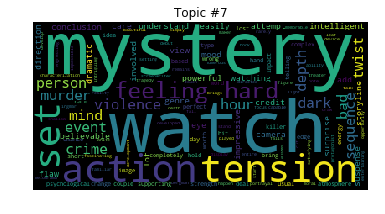

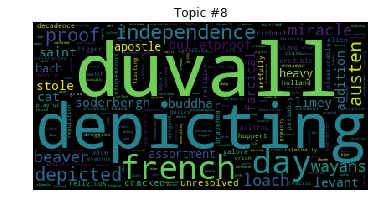

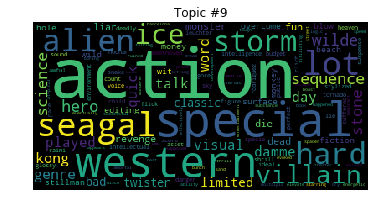

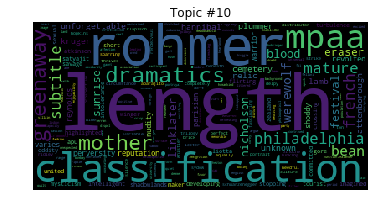

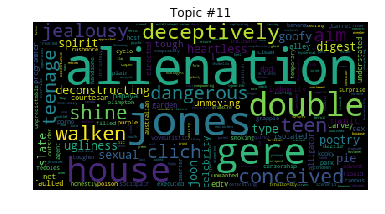

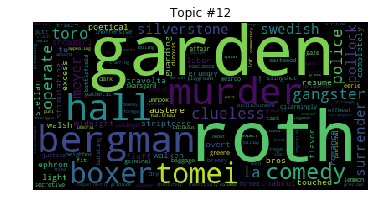

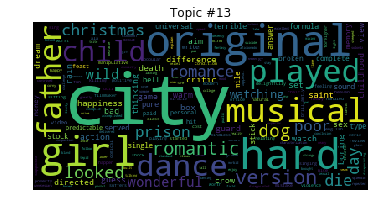

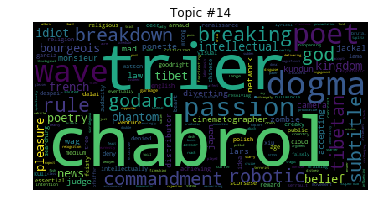

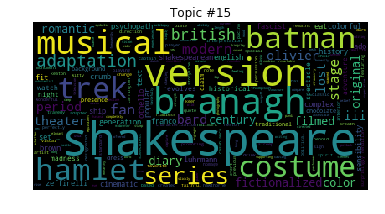

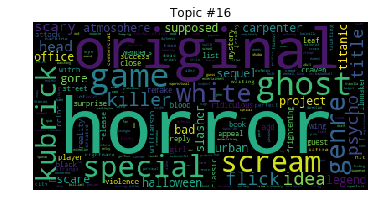

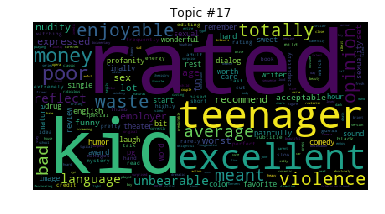

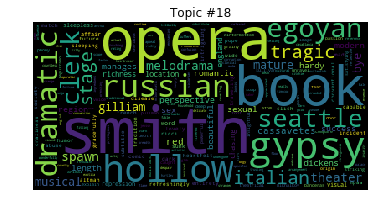

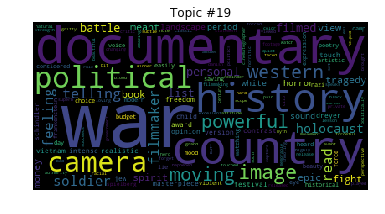

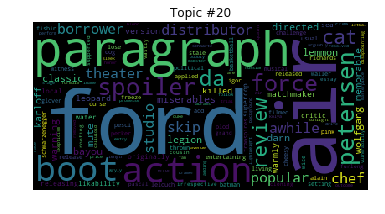

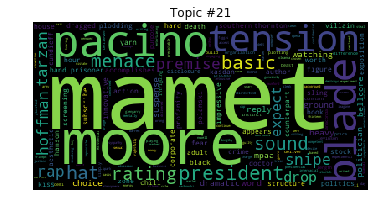

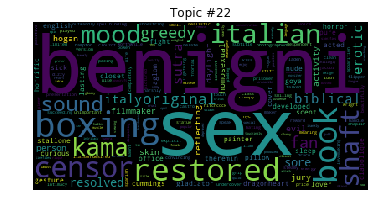

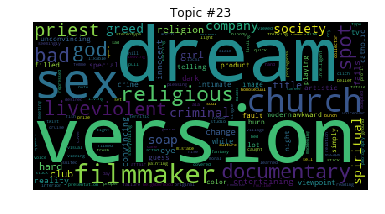

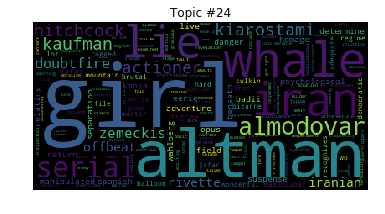

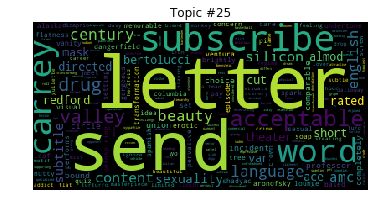

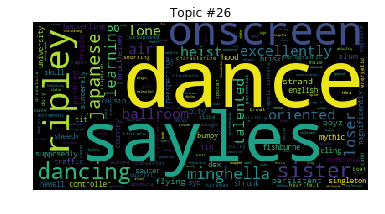

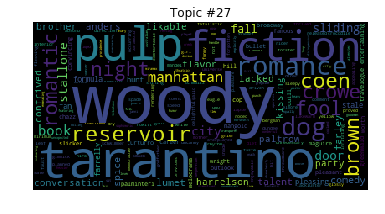

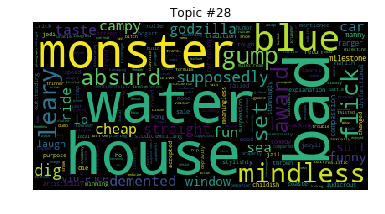

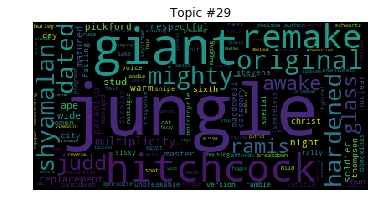

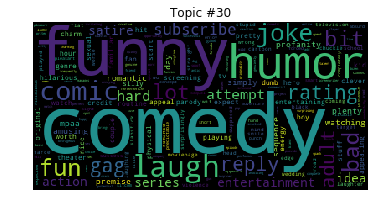

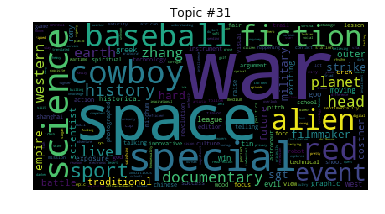

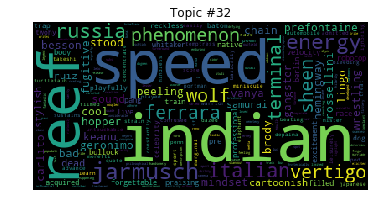

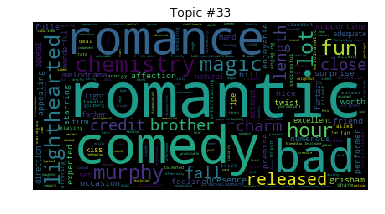

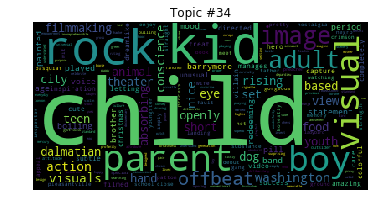

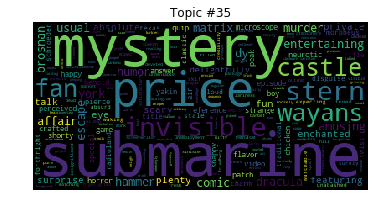

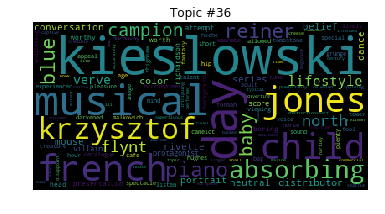

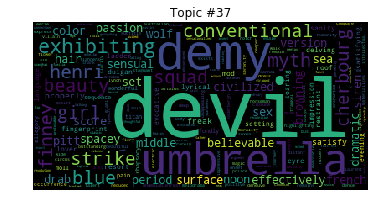

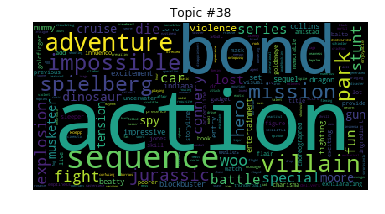

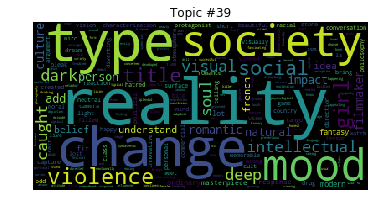

In [52]:
create_word_cloud(models[6])

In [60]:
ldamodel = models[7]
for t in range(ldamodel.num_topics):
    print("For topic", t) 
    print(sid.polarity_scores(' '.join([x[0] for x in ldamodel.show_topic(t,10)])))

For topic 0
{'neg': 0.62, 'neu': 0.38, 'pos': 0.0, 'compound': -0.9081}
For topic 1
{'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound': 0.0}
For topic 2
{'neg': 0.323, 'neu': 0.677, 'pos': 0.0, 'compound': -0.6486}
For topic 3
{'neg': 0.0, 'neu': 0.703, 'pos': 0.297, 'compound': 0.5859}
For topic 4
{'neg': 0.204, 'neu': 0.796, 'pos': 0.0, 'compound': -0.3182}
For topic 5
{'neg': 0.155, 'neu': 0.473, 'pos': 0.372, 'compound': 0.4939}
For topic 6
{'neg': 0.0, 'neu': 0.682, 'pos': 0.318, 'compound': 0.6369}
For topic 7
{'neg': 0.635, 'neu': 0.281, 'pos': 0.084, 'compound': -0.8689}
For topic 8
{'neg': 0.0, 'neu': 0.703, 'pos': 0.297, 'compound': 0.5859}
For topic 9
{'neg': 0.34, 'neu': 0.476, 'pos': 0.184, 'compound': -0.3182}
For topic 10
{'neg': 0.0, 'neu': 0.763, 'pos': 0.237, 'compound': 0.4215}
For topic 11
{'neg': 0.189, 'neu': 0.811, 'pos': 0.0, 'compound': -0.2732}
For topic 12
{'neg': 0.431, 'neu': 0.419, 'pos': 0.15, 'compound': -0.6908}
For topic 13
{'neg': 0.107, 'neu': 0.534, 'p

In [53]:
import gensim

In [54]:
model = gensim.models.KeyedVectors.load_word2vec_format('./review/GoogleNews-vectors-negative300.bin', binary=True)  

In [55]:
def get_title(topic, n):
    weight_avg = np.zeros((300,), dtype='f')
    weight_total = 0
    for x in topic:
        if x[0] in model:
            weight_avg += model[x[0]] * x[1]
            weight_total += x[1]
    weight_avg /= weight_total
    weight_avg = np.array(weight_avg)
    return model.most_similar(positive=[weight_avg], negative=[], topn=n)

In [68]:
get_title(ldamodel.show_topic(27,10), 3)

[('woody', 0.8453221321105957),
 ('woodier', 0.6017347574234009),
 ('herbaceous', 0.589889645576477)]